In [1]:
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append('../..')
from src import raw_data_path, direcslist, load_image, ImageQuant2, bounded_mean_1d, dosage
%matplotlib widget

In [2]:
# Specify paths
path = raw_data_path + '/Imaging/ring_ph'
paths = direcslist(path, 1)
lines = [p.strip('/').split('/')[-2].split('_')[1] for p in paths]
conditions = [p.strip('/').split('/')[-2].split('_')[2] for p in paths]

# Import data
imgs = [load_image(p + '/af_corrected.tif') for p in paths]
rois = [np.loadtxt(p + '/ROI_fit.txt') for p in paths]

# Import quantification model
membg = np.loadtxt('../../data/calibration_mem6.txt')
cytbg = np.loadtxt('../../data/calibration_cyt.txt')
calibration_factor = np.loadtxt('../../data/calibration_constants.txt')[6]
print(calibration_factor)

3.105838399548696


  0%|                                                                                                                                                         | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                                                                | 1/600 [00:00<09:30,  1.05it/s]

  1%|█▉                                                                                                                                               | 8/600 [00:01<00:59,  9.92it/s]

  2%|███▌                                                                                                                                            | 15/600 [00:01<00:30, 18.99it/s]

  4%|█████▎                                                                                                                                          | 22/600 [00:01<00:20, 27.59it/s]

  5%|██████▉                                                                                                                                         | 29/600 [00:01<00:16, 35.31it/s]

  6%|████████▋                                                                                                                                       | 36/600 [00:01<00:13, 41.94it/s]

  7%|██████████▎                                                                                                                                     | 43/600 [00:01<00:11, 47.78it/s]

  8%|████████████                                                                                                                                    | 50/600 [00:01<00:10, 51.88it/s]

 10%|█████████████▋                                                                                                                                  | 57/600 [00:01<00:09, 54.64it/s]

 11%|███████████████▎                                                                                                                                | 64/600 [00:01<00:09, 55.24it/s]

 12%|█████████████████                                                                                                                               | 71/600 [00:02<00:09, 54.85it/s]

 13%|██████████████████▍                                                                                                                             | 77/600 [00:02<00:09, 54.67it/s]

 14%|███████████████████▉                                                                                                                            | 83/600 [00:02<00:09, 53.85it/s]

 15%|█████████████████████▎                                                                                                                          | 89/600 [00:02<00:10, 46.65it/s]

 16%|██████████████████████▌                                                                                                                         | 94/600 [00:02<00:11, 44.45it/s]

 16%|███████████████████████▊                                                                                                                        | 99/600 [00:02<00:11, 45.19it/s]

 17%|████████████████████████▊                                                                                                                      | 104/600 [00:02<00:10, 46.29it/s]

 18%|██████████████████████████▏                                                                                                                    | 110/600 [00:02<00:10, 47.60it/s]

 19%|███████████████████████████▋                                                                                                                   | 116/600 [00:03<00:09, 48.43it/s]

 20%|████████████████████████████▊                                                                                                                  | 121/600 [00:03<00:09, 48.31it/s]

 21%|██████████████████████████████                                                                                                                 | 126/600 [00:03<00:09, 48.74it/s]

 22%|███████████████████████████████▍                                                                                                               | 132/600 [00:03<00:09, 50.69it/s]

 23%|████████████████████████████████▉                                                                                                              | 138/600 [00:03<00:08, 51.96it/s]

 24%|██████████████████████████████████▎                                                                                                            | 144/600 [00:03<00:08, 52.64it/s]

 25%|███████████████████████████████████▊                                                                                                           | 150/600 [00:03<00:08, 52.66it/s]

 26%|█████████████████████████████████████▏                                                                                                         | 156/600 [00:03<00:08, 53.13it/s]

 27%|██████████████████████████████████████▌                                                                                                        | 162/600 [00:03<00:08, 53.86it/s]

 28%|████████████████████████████████████████                                                                                                       | 168/600 [00:04<00:07, 54.09it/s]

 29%|█████████████████████████████████████████▍                                                                                                     | 174/600 [00:04<00:07, 54.30it/s]

 30%|██████████████████████████████████████████▉                                                                                                    | 180/600 [00:04<00:07, 55.26it/s]

 31%|████████████████████████████████████████████▌                                                                                                  | 187/600 [00:04<00:07, 57.28it/s]

 32%|█████████████████████████████████████████████▉                                                                                                 | 193/600 [00:04<00:07, 57.72it/s]

 33%|███████████████████████████████████████████████▍                                                                                               | 199/600 [00:04<00:07, 56.85it/s]

 34%|████████████████████████████████████████████████▊                                                                                              | 205/600 [00:04<00:07, 55.84it/s]

 35%|██████████████████████████████████████████████████▎                                                                                            | 211/600 [00:04<00:07, 55.51it/s]

 36%|███████████████████████████████████████████████████▋                                                                                           | 217/600 [00:04<00:06, 54.99it/s]

 37%|█████████████████████████████████████████████████████▏                                                                                         | 223/600 [00:05<00:06, 54.06it/s]

 38%|██████████████████████████████████████████████████████▌                                                                                        | 229/600 [00:05<00:06, 54.82it/s]

 39%|████████████████████████████████████████████████████████                                                                                       | 235/600 [00:05<00:06, 54.03it/s]

 40%|█████████████████████████████████████████████████████████▍                                                                                     | 241/600 [00:05<00:06, 51.93it/s]

 41%|██████████████████████████████████████████████████████████▊                                                                                    | 247/600 [00:05<00:06, 50.68it/s]

 42%|████████████████████████████████████████████████████████████▎                                                                                  | 253/600 [00:05<00:06, 50.27it/s]

 43%|█████████████████████████████████████████████████████████████▋                                                                                 | 259/600 [00:05<00:06, 50.29it/s]

 44%|███████████████████████████████████████████████████████████████▏                                                                               | 265/600 [00:05<00:06, 50.19it/s]

 45%|████████████████████████████████████████████████████████████████▌                                                                              | 271/600 [00:05<00:06, 50.68it/s]

 46%|██████████████████████████████████████████████████████████████████                                                                             | 277/600 [00:06<00:06, 50.78it/s]

 47%|███████████████████████████████████████████████████████████████████▍                                                                           | 283/600 [00:06<00:06, 50.88it/s]

 48%|████████████████████████████████████████████████████████████████████▉                                                                          | 289/600 [00:06<00:06, 51.01it/s]

 49%|██████████████████████████████████████████████████████████████████████▎                                                                        | 295/600 [00:06<00:05, 51.60it/s]

 50%|███████████████████████████████████████████████████████████████████████▋                                                                       | 301/600 [00:06<00:05, 52.67it/s]

 51%|█████████████████████████████████████████████████████████████████████████▏                                                                     | 307/600 [00:06<00:05, 53.11it/s]

 52%|██████████████████████████████████████████████████████████████████████████▌                                                                    | 313/600 [00:06<00:05, 53.66it/s]

 53%|████████████████████████████████████████████████████████████████████████████                                                                   | 319/600 [00:06<00:05, 53.67it/s]

 54%|█████████████████████████████████████████████████████████████████████████████▍                                                                 | 325/600 [00:06<00:05, 54.14it/s]

 55%|██████████████████████████████████████████████████████████████████████████████▉                                                                | 331/600 [00:07<00:05, 52.63it/s]

 56%|████████████████████████████████████████████████████████████████████████████████▎                                                              | 337/600 [00:07<00:05, 50.98it/s]

 57%|█████████████████████████████████████████████████████████████████████████████████▋                                                             | 343/600 [00:07<00:04, 53.35it/s]

 58%|███████████████████████████████████████████████████████████████████████████████████▏                                                           | 349/600 [00:07<00:04, 52.66it/s]

 59%|████████████████████████████████████████████████████████████████████████████████████▊                                                          | 356/600 [00:07<00:04, 55.51it/s]

 60%|██████████████████████████████████████████████████████████████████████████████████████▎                                                        | 362/600 [00:07<00:04, 53.04it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████████▉                                                       | 369/600 [00:07<00:04, 55.53it/s]

 62%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                     | 375/600 [00:07<00:03, 56.61it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████████████                                                    | 382/600 [00:08<00:03, 58.57it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████████████▋                                                  | 389/600 [00:08<00:03, 59.77it/s]

 66%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 396/600 [00:08<00:03, 60.64it/s]

 67%|████████████████████████████████████████████████████████████████████████████████████████████████                                               | 403/600 [00:08<00:03, 61.64it/s]

 68%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 410/600 [00:08<00:03, 61.90it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 417/600 [00:08<00:02, 61.69it/s]

 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 424/600 [00:08<00:02, 60.27it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 431/600 [00:08<00:02, 60.50it/s]

 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 438/600 [00:08<00:02, 54.74it/s]

 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 444/600 [00:09<00:02, 55.38it/s]

 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 450/600 [00:09<00:02, 50.96it/s]

 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 456/600 [00:09<00:02, 50.07it/s]

 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 462/600 [00:09<00:02, 49.44it/s]

 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 468/600 [00:09<00:02, 49.72it/s]

 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 474/600 [00:09<00:02, 49.05it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 479/600 [00:09<00:02, 47.75it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 485/600 [00:09<00:02, 48.88it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 490/600 [00:10<00:02, 48.75it/s]

 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 496/600 [00:10<00:02, 49.62it/s]

 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 502/600 [00:10<00:01, 51.05it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 508/600 [00:10<00:01, 52.41it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 514/600 [00:10<00:01, 52.59it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 520/600 [00:10<00:01, 52.88it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 526/600 [00:10<00:01, 53.23it/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 532/600 [00:10<00:01, 54.11it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 538/600 [00:10<00:01, 54.54it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 544/600 [00:11<00:01, 54.82it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 550/600 [00:11<00:00, 54.58it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 556/600 [00:11<00:00, 55.09it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 562/600 [00:11<00:00, 55.14it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 568/600 [00:11<00:00, 52.68it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 574/600 [00:11<00:00, 51.04it/s]

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 580/600 [00:11<00:00, 50.52it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 586/600 [00:11<00:00, 50.22it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 592/600 [00:11<00:00, 49.84it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 598/600 [00:12<00:00, 49.89it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:12<00:00, 49.44it/s]

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

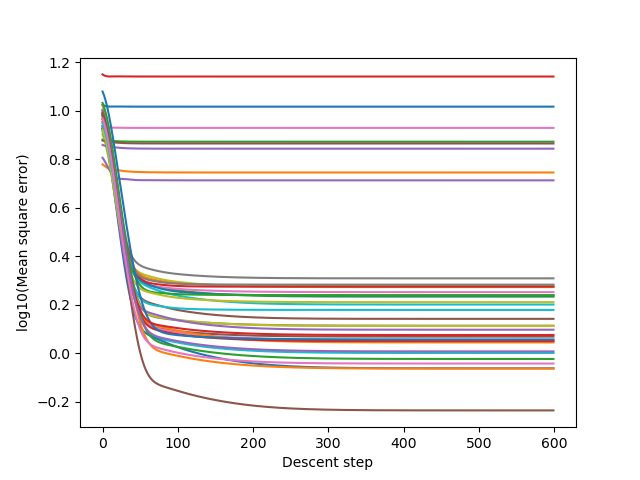

In [3]:
# Quantification
iq = ImageQuant2(img=imgs, roi=rois, cytbg=cytbg, membg=membg, pooling_rate=1, rol_ave=5, nfits=100)
iq.quantify()
iq.plot_losses(log=True)

In [4]:
# iq.plot_fits()

In [5]:
# iq.plot_quantification()

In [6]:
# Compile and save results
res = iq.compile_res()
res['Membrane signal'] *= calibration_factor
res.to_csv('../../data/ring_ph_quantification.csv')

In [7]:
# Perform summary quantification
res = pd.read_csv('../../data/ring_ph_quantification.csv')
cyts = res.groupby('EmbryoID').apply(lambda x: np.mean(x['Cytoplasmic signal']))
mems_tot = res.groupby('EmbryoID').apply(lambda x: np.mean(x['Membrane signal'])) 
mems_ant = res.groupby('EmbryoID').apply(lambda x: bounded_mean_1d(x['Membrane signal'], (0.25, 0.75))) 
mems_post = res.groupby('EmbryoID').apply(lambda x: bounded_mean_1d(x['Membrane signal'], (0.75, 0.25))) 
asis = [(p - a) / (a + p) for a, p in zip(mems_ant, mems_post)]
dosages = [dosage(i, r, 5) for i, r in zip(imgs, rois)]
totals = cyts + 0.174 * mems_tot
   
df_dict = {'Path': paths, 'Line': lines, 'Condition': conditions, 'Cyt': cyts, 'Mem_tot': mems_tot, 
           'Mem_ant': mems_ant, 'Mem_post': mems_post, 'ASI': asis, 'Dosage': dosages, 'Total': totals}
df = pd.DataFrame(df_dict)
df['Path'] = df['Path'].apply(lambda x: x[len(raw_data_path):])
df.to_csv('../../data/ring_ph_embryos.csv')

### Remove polar body

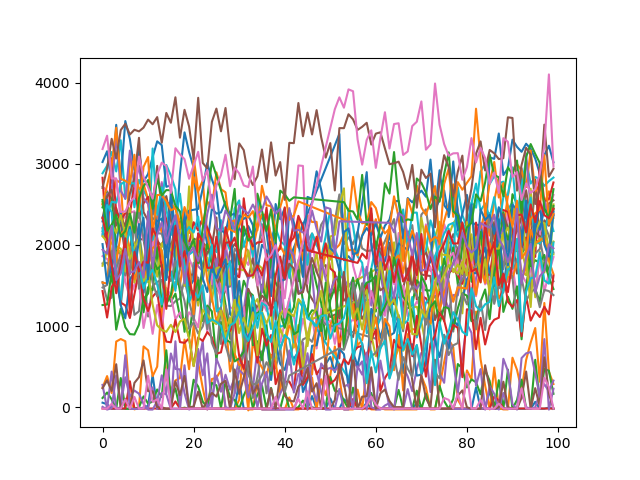

In [8]:
def nan_helper(y):
    return np.isnan(y), lambda z: z.nonzero()[0]

fig, ax = plt.subplots()
res = pd.read_csv('../../data/ring_ph_quantification.csv')
res_grouped = res.groupby('EmbryoID')
for (g, r), p, roi in zip(res_grouped, paths, rois):
    _mems = r['Membrane signal']
    mems = _mems.to_numpy()
    if os.path.exists(p + '/polar_body.txt'):
        polar_body = np.loadtxt(p + '/polar_body.txt')
        ind = int(100 * np.argmin(np.linalg.norm(roi - polar_body, axis=1)) / roi.shape[0])
        mems[ind-5:ind+5] = np.nan
        nans, x= nan_helper(mems)
        mems[nans] = np.interp(x(nans), x(~nans), mems[~nans])  
    ax.plot(mems)
    res.loc[_mems.index, 'Membrane signal'] = mems
res.to_csv('../../data/ring_ph_quantification_no_pb.csv')

In [9]:
# Perform summary quantification
res = pd.read_csv('../../data/ring_ph_quantification_no_pb.csv')
cyts = res.groupby('EmbryoID').apply(lambda x: np.mean(x['Cytoplasmic signal']))
mems_tot = res.groupby('EmbryoID').apply(lambda x: np.mean(x['Membrane signal'])) 
mems_ant = res.groupby('EmbryoID').apply(lambda x: bounded_mean_1d(x['Membrane signal'], (0.25, 0.75))) 
mems_post = res.groupby('EmbryoID').apply(lambda x: bounded_mean_1d(x['Membrane signal'], (0.75, 0.25))) 
asis = [(p - a) / (a + p) for a, p in zip(mems_ant, mems_post)]
dosages = [dosage(i, r, 5) for i, r in zip(imgs, rois)]
totals = cyts + 0.174 * mems_tot
   
df_dict = {'Path': paths, 'Line': lines, 'Condition': conditions, 'Cyt': cyts, 'Mem_tot': mems_tot, 
           'Mem_ant': mems_ant, 'Mem_post': mems_post, 'ASI': asis, 'Dosage': dosages, 'Total': totals}
df = pd.DataFrame(df_dict)
df['Path'] = df['Path'].apply(lambda x: x[len(raw_data_path):])
df.to_csv('../../data/ring_ph_embryos_no_pb.csv')